In [2]:
import pkg_resources
pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [3]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/xingyuchen0810/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
filename="tiktokban_tweets.csv"
df=pd.read_csv(filename)

In [16]:
df = smalldata[['content', 'score']]
df.describe()

,score
count,460287.000000
mean,4.234919
std,1.430718
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  175 non-null    object
 1   text      175 non-null    object
 2   date      175 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


In [8]:
df = df[df['text'].notnull()]

In [10]:
nlp = spacy.load("en_core_web_sm")
# lower cas
df['new_content'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(20)

,username,text,date,new_text,new_content
0,andygremett,"As talk of a #TikTokBan gains momentum, @TheDr...",2023-04-29 16:02:29+00:00,"as talk of a #tiktokban gains momentum, @thedr...","as talk of a #tiktokban gains momentum, @thedr..."
1,Healthy_Dogs_,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:51:23+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,#tiktok #tiktokban #tiktok #usa the legal impl...
2,WiseAssMoFo,#CENSORSHIP: Montana governor wants to expand ...,2023-04-29 15:44:44+00:00,#censorship: montana governor wants to expand ...,#censorship: montana governor wants to expand ...
3,DandyLookup,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:18:28+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,#tiktok #tiktokban #tiktok #usa the legal impl...
4,UnrealHexican,@KanekoaTheGreat @elonmusk Besides the data co...,2023-04-29 12:19:48+00:00,@kanekoathegreat @elonmusk besides the data co...,@kanekoathegreat @elonmusk besides the data co...
5,insidetelecom_,"According to research, five million businesses...",2023-04-29 11:00:21+00:00,"according to research, five million businesses...","according to research, five million businesses..."
6,sizzle_sarah,Not me bringing my silly #TikTok #videos to Tw...,2023-04-28 22:45:14+00:00,not me bringing my silly #tiktok #videos to tw...,not me bringing my silly #tiktok #videos to tw...
7,Americas_FS,Montana's Governor is pushing to broaden a bil...,2023-04-28 22:00:26+00:00,montana's governor is pushing to broaden a bil...,montana's governor is pushing to broaden a bil...
8,TrevorSquire1,Where did he go? #FYP #NewToClapper #TikTokBan...,2023-04-28 20:37:55+00:00,where did he go? #fyp #newtoclapper #tiktokban...,where did he go? #fyp #newtoclapper #tiktokban...
9,magicytes,$bbig #tiktok #tiktokban #InfluencerMarketing ...,2023-04-28 18:56:15+00:00,$bbig #tiktok #tiktokban #influencermarketing ...,$bbig #tiktok #tiktokban #influencermarketing ...


In [11]:
# remove punctuationscasc
df['new_content'] = df['new_content'].str.replace('[^\w\s]','')
df.head(20)

<>:2: DeprecationWarning: invalid escape sequence '\w'
<>:2: DeprecationWarning: invalid escape sequence '\w'
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_10154/1495747900.py:2: DeprecationWarning: invalid escape sequence '\w'
  df['new_content'] = df['new_content'].str.replace('[^\w\s]','')
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_10154/1495747900.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_content'] = df['new_content'].str.replace('[^\w\s]','')


,username,text,date,new_text,new_content
0,andygremett,"As talk of a #TikTokBan gains momentum, @TheDr...",2023-04-29 16:02:29+00:00,"as talk of a #tiktokban gains momentum, @thedr...",as talk of a tiktokban gains momentum thedrum ...
1,Healthy_Dogs_,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:51:23+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa the legal implicat...
2,WiseAssMoFo,#CENSORSHIP: Montana governor wants to expand ...,2023-04-29 15:44:44+00:00,#censorship: montana governor wants to expand ...,censorship montana governor wants to expand st...
3,DandyLookup,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:18:28+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa the legal implicat...
4,UnrealHexican,@KanekoaTheGreat @elonmusk Besides the data co...,2023-04-29 12:19:48+00:00,@kanekoathegreat @elonmusk besides the data co...,kanekoathegreat elonmusk besides the data coll...
5,insidetelecom_,"According to research, five million businesses...",2023-04-29 11:00:21+00:00,"according to research, five million businesses...",according to research five million businesses ...
6,sizzle_sarah,Not me bringing my silly #TikTok #videos to Tw...,2023-04-28 22:45:14+00:00,not me bringing my silly #tiktok #videos to tw...,not me bringing my silly tiktok videos to twit...
7,Americas_FS,Montana's Governor is pushing to broaden a bil...,2023-04-28 22:00:26+00:00,montana's governor is pushing to broaden a bil...,montanas governor is pushing to broaden a bill...
8,TrevorSquire1,Where did he go? #FYP #NewToClapper #TikTokBan...,2023-04-28 20:37:55+00:00,where did he go? #fyp #newtoclapper #tiktokban...,where did he go fyp newtoclapper tiktokban ht...
9,magicytes,$bbig #tiktok #tiktokban #InfluencerMarketing ...,2023-04-28 18:56:15+00:00,$bbig #tiktok #tiktokban #influencermarketing ...,bbig tiktok tiktokban influencermarketing web3...


In [12]:
# remove numerical values
df['new_content'] = df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x.isalpha()))
df.head(20)

,username,text,date,new_text,new_content
0,andygremett,"As talk of a #TikTokBan gains momentum, @TheDr...",2023-04-29 16:02:29+00:00,"as talk of a #tiktokban gains momentum, @thedr...",as talk of a tiktokban gains momentum thedrum ...
1,Healthy_Dogs_,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:51:23+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa the legal implicat...
2,WiseAssMoFo,#CENSORSHIP: Montana governor wants to expand ...,2023-04-29 15:44:44+00:00,#censorship: montana governor wants to expand ...,censorship montana governor wants to expand st...
3,DandyLookup,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:18:28+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa the legal implicat...
4,UnrealHexican,@KanekoaTheGreat @elonmusk Besides the data co...,2023-04-29 12:19:48+00:00,@kanekoathegreat @elonmusk besides the data co...,kanekoathegreat elonmusk besides the data coll...
5,insidetelecom_,"According to research, five million businesses...",2023-04-29 11:00:21+00:00,"according to research, five million businesses...",according to research five million businesses ...
6,sizzle_sarah,Not me bringing my silly #TikTok #videos to Tw...,2023-04-28 22:45:14+00:00,not me bringing my silly #tiktok #videos to tw...,not me bringing my silly tiktok videos to twit...
7,Americas_FS,Montana's Governor is pushing to broaden a bil...,2023-04-28 22:00:26+00:00,montana's governor is pushing to broaden a bil...,montanas governor is pushing to broaden a bill...
8,TrevorSquire1,Where did he go? #FYP #NewToClapper #TikTokBan...,2023-04-28 20:37:55+00:00,where did he go? #fyp #newtoclapper #tiktokban...,where did he go fyp newtoclapper tiktokban via...
9,magicytes,$bbig #tiktok #tiktokban #InfluencerMarketing ...,2023-04-28 18:56:15+00:00,$bbig #tiktok #tiktokban #influencermarketing ...,bbig tiktok tiktokban influencermarketing lbgt...


In [13]:
# remove stopwords
stop = stopwords.words('english')
df['new_content'] = df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,username,text,date,new_text,new_content
0,andygremett,"As talk of a #TikTokBan gains momentum, @TheDr...",2023-04-29 16:02:29+00:00,"as talk of a #tiktokban gains momentum, @thedr...",talk tiktokban gains momentum thedrum catches ...
1,Healthy_Dogs_,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:51:23+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa legal implications...
2,WiseAssMoFo,#CENSORSHIP: Montana governor wants to expand ...,2023-04-29 15:44:44+00:00,#censorship: montana governor wants to expand ...,censorship montana governor wants expand state...
3,DandyLookup,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:18:28+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa legal implications...
4,UnrealHexican,@KanekoaTheGreat @elonmusk Besides the data co...,2023-04-29 12:19:48+00:00,@kanekoathegreat @elonmusk besides the data co...,kanekoathegreat elonmusk besides data collecti...
5,insidetelecom_,"According to research, five million businesses...",2023-04-29 11:00:21+00:00,"according to research, five million businesses...",according research five million businesses use...
6,sizzle_sarah,Not me bringing my silly #TikTok #videos to Tw...,2023-04-28 22:45:14+00:00,not me bringing my silly #tiktok #videos to tw...,bringing silly tiktok videos twitter fyp india...
7,Americas_FS,Montana's Governor is pushing to broaden a bil...,2023-04-28 22:00:26+00:00,montana's governor is pushing to broaden a bil...,montanas governor pushing broaden bill banning...
8,TrevorSquire1,Where did he go? #FYP #NewToClapper #TikTokBan...,2023-04-28 20:37:55+00:00,where did he go? #fyp #newtoclapper #tiktokban...,go fyp newtoclapper tiktokban via theclapperapp
9,magicytes,$bbig #tiktok #tiktokban #InfluencerMarketing ...,2023-04-28 18:56:15+00:00,$bbig #tiktok #tiktokban #influencermarketing ...,bbig tiktok tiktokban influencermarketing lbgt...


In [14]:
# remove non-english words
df = df[df['new_content'].map(lambda x: x.isascii())]

In [15]:
# lemmatization using Spacy
from tqdm import tqdm
tqdm.pandas()
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['new_content'] = df['new_content'].progress_apply(space)
df.head(20)

100%|██████████| 172/172 [00:00<00:00, 239.92it/s]


,username,text,date,new_text,new_content
0,andygremett,"As talk of a #TikTokBan gains momentum, @TheDr...",2023-04-29 16:02:29+00:00,"as talk of a #tiktokban gains momentum, @thedr...",talk tiktokban gain momentum thedrum catch mar...
1,Healthy_Dogs_,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:51:23+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa legal implication ...
2,WiseAssMoFo,#CENSORSHIP: Montana governor wants to expand ...,2023-04-29 15:44:44+00:00,#censorship: montana governor wants to expand ...,censorship montana governor want expand state ...
3,DandyLookup,#TikTok #TikTokBan #TikTok #USA\nThe Legal Imp...,2023-04-29 15:18:28+00:00,#tiktok #tiktokban #tiktok #usa the legal impl...,tiktok tiktokban tiktok usa legal implication ...
4,UnrealHexican,@KanekoaTheGreat @elonmusk Besides the data co...,2023-04-29 12:19:48+00:00,@kanekoathegreat @elonmusk besides the data co...,kanekoathegreat elonmusk besides datum collect...
5,insidetelecom_,"According to research, five million businesses...",2023-04-29 11:00:21+00:00,"according to research, five million businesses...",accord research five million business use ban ...
6,sizzle_sarah,Not me bringing my silly #TikTok #videos to Tw...,2023-04-28 22:45:14+00:00,not me bringing my silly #tiktok #videos to tw...,bring silly tiktok video twitter fyp indiastan...
7,Americas_FS,Montana's Governor is pushing to broaden a bil...,2023-04-28 22:00:26+00:00,montana's governor is pushing to broaden a bil...,montanas governor push broaden bill ban tiktok...
8,TrevorSquire1,Where did he go? #FYP #NewToClapper #TikTokBan...,2023-04-28 20:37:55+00:00,where did he go? #fyp #newtoclapper #tiktokban...,go fyp newtoclapper tiktokban via theclapperapp
9,magicytes,$bbig #tiktok #tiktokban #InfluencerMarketing ...,2023-04-28 18:56:15+00:00,$bbig #tiktok #tiktokban #influencermarketing ...,bbig tiktok tiktokban influencermarkete lbgtq ...


In [3]:
df.to_csv('data/new_tiktok_google_play_reviews.csv',index=False)

NameError: name 'df' is not defined

In [102]:
filename="data/new_tiktok_google_play_reviews.csv"

df=pd.read_csv(filename)
df = df[df['new_content'].notnull()]

In [103]:
df

,content,score,new_content
0,No words,5,word
1,Great fun app so far!,5,great fun app far
2,The app would get a higher rating but I litera...,1,app would get high rating literally can not si...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,picture record
...,...,...,...
445783,I love it,5,love
445785,Very nice,1,nice
445786,Nice,5,nice
445787,TikTok love your sad,5,tiktok love sad


In [163]:
new_df = df[df['new_content'].apply(lambda x: len(x) > 3) & df['new_content'].apply(lambda x: len(x) < 50)]

In [16]:
new_df = df

In [17]:

arm_df = new_df['new_content'].str.split(expand=True)
arm_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,talk,tiktokban,gain,momentum,thedrum,catch,marketing,expert,find,see,ad,None,None,None,None,None
1,tiktok,tiktokban,tiktok,usa,legal,implication,tiktok,us,app,ban,dodge,None,None,None,None,None
2,censorship,montana,governor,want,expand,state,tiktokban,potentially,include,socialmedia,platform,None,None,None,None,None
3,tiktok,tiktokban,tiktok,usa,legal,implication,tiktok,us,app,ban,dodge,None,None,None,None,None
4,kanekoathegreat,elonmusk,besides,datum,collection,social,platform,tiktok,great,vehicle,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,tiktok,immense,cultural,impact,unquestionable,particularly,asia,pacific,region,however,west,c,None,None,None,None
171,expert,mtleg,tiktokban,do,not,understand,today,technology,can,not,enforce,likely,cost,None,None,None
172,gavinnewsom,gavin,bill,say,do,not,say,gay,restrictact,say,tiktokban,None,None,None,None,None
173,know,tiktok,tiktokban,knowingishalfthebattle,None,None,None,None,None,None,None,None,None,None,None,None


In [18]:
arm_df = arm_df.reset_index(drop=True)
# arm_df = arm_df.drop(['index'], axis = 1)
arm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,talk,tiktokban,gain,momentum,thedrum,catch,marketing,expert,find,see,ad,None,None,None,None,None
1,tiktok,tiktokban,tiktok,usa,legal,implication,tiktok,us,app,ban,dodge,None,None,None,None,None
2,censorship,montana,governor,want,expand,state,tiktokban,potentially,include,socialmedia,platform,None,None,None,None,None
3,tiktok,tiktokban,tiktok,usa,legal,implication,tiktok,us,app,ban,dodge,None,None,None,None,None
4,kanekoathegreat,elonmusk,besides,datum,collection,social,platform,tiktok,great,vehicle,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,tiktok,immense,cultural,impact,unquestionable,particularly,asia,pacific,region,however,west,c,None,None,None,None
168,expert,mtleg,tiktokban,do,not,understand,today,technology,can,not,enforce,likely,cost,None,None,None
169,gavinnewsom,gavin,bill,say,do,not,say,gay,restrictact,say,tiktokban,None,None,None,None,None
170,know,tiktok,tiktokban,knowingishalfthebattle,None,None,None,None,None,None,None,None,None,None,None,None


In [19]:

arm_df.to_csv('new_arm_for_r.csv')

In [20]:
HeadlineLIST= new_df['new_content']


In [22]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english"
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))
#vocab is a vocabulary list
vocab = MyCountV.get_feature_names()  # change to a list
print(list(vocab)[10:20])


MyDTM = MyDTM.toarray()  # convert to a regular array
print(type(MyDTM))

ColumnNames=MyCountV.get_feature_names()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)
print(MyDTM_DF)

num_topics = 5

lda_model_DH = LatentDirichletAllocation(n_components=num_topics,
                                         max_iter=20, learning_method='online', verbose=True)
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)
fontsize_base = 13

<class 'scipy.sparse._csr.csr_matrix'>
['addiction', 'address', 'adult', 'advance', 'agenda', 'ago', 'aiville', 'alexthehumanoid', 'algorithmic', 'alien']
<class 'numpy.ndarray'>
     abc  accept  access  accord  accoun  account  acknowledge  act  ad  \
0      0       0       0       0       0        0            0    0   1   
1      0       0       0       0       0        0            0    0   0   
2      0       0       0       0       0        0            0    0   0   
3      0       0       0       0       0        0            0    0   0   
4      0       0       0       0       0        0            0    0   0   
..   ...     ...     ...     ...     ...      ...          ...  ...  ..   
167    0       0       0       0       0        0            0    0   0   
168    0       0       0       0       0        0            0    0   0   
169    0       0       0       0       0        0            0    0   0   
170    0       0       0       0       0        0            0    0   0

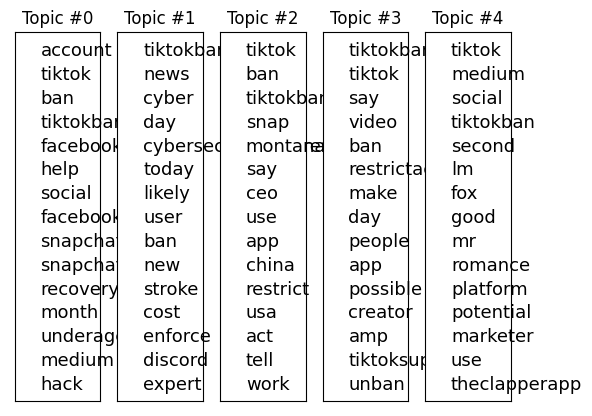

In [23]:
# LDA1
fig = plt.figure()
for t in range(num_topics):

    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
        ##fontsize_base*share)

mpld3.save_html(fig,'lda1.html')

In [24]:
# LDA2
pyLDAvis.enable_notebook() ## not using notebook

dtm = np.matrix(MyDTM)
panel = LDAvis.prepare(lda_model_DH, dtm, MyCountV, mds='tsne')

pyLDAvis.save_html(panel, "lda2.html")

/opt/homebrew/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/homebrew/lib/python3.10/site-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/opt/homebrew/lib/python3.10/site-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/opt/homebrew/lib/python3.10/site-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/opt/homebrew/lib/python3.10/site-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is

In [43]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english",
    max_features=100
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names()
DF_Count=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [44]:
new_df.loc[new_df['score'] == 5, 'score'] = 'very good'
new_df.loc[new_df['score'] == 4, 'score'] = 'good'
new_df.loc[new_df['score'] == 3, 'score'] = 'average'
new_df.loc[new_df['score'] == 2, 'score'] = 'bad'
new_df.loc[new_df['score'] == 1, 'score'] = 'very bad'

In [45]:
new_df = new_df.reset_index()

In [46]:
DF_Count=DF_Count.rename(new_df['score'], axis="index")
print(DF_Count) 

           aap  addict  addictive  ali  amazing  ap  apk  apo  app  appp  ...  \
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
...        ...     ...        ...  ...      ...  ..  ...  ...  ...   ...  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very bad     0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   

           valo  video  vie

In [60]:
DF_Count.to_csv('data/df_count.csv')

In [168]:
filename="data/df_count.csv"

df=pd.read_csv(filename)

In [169]:
df

,Unnamed: 0,aap,addict,addictive,ali,amazing,ap,apk,apo,app,...,valo,video,view,viral,watch,wonderful,work,wow,year,yes
0,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176010,very bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176011,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df = df.rename(columns={ df.columns[0]: "LABEL" })
df

,LABEL,aap,addict,addictive,ali,amazing,ap,apk,apo,app,...,valo,video,view,viral,watch,wonderful,work,wow,year,yes
0,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176010,very bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176011,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_tem = df
df_tem = df_tem.drop(['LABEL'], axis = 1)
df_tem

,aap,addict,addictive,ali,amazing,ap,apk,apo,app,appp,...,valo,video,view,viral,watch,wonderful,work,wow,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 500], axis=1, inplace=True)

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_11272/2670894102.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 500], axis=1, inplace=True)


In [177]:
df_tem

,amazing,app,awesome,bad,cool,enjoy,entertain,excellent,fantastic,fun,...,like,love,lovely,nice,perfect,super,thank,tik,tok,wonderful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
176010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
176011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [178]:
df_tem['LABEL'] = df['LABEL']
df_tem

,amazing,app,awesome,bad,cool,enjoy,entertain,excellent,fantastic,fun,...,love,lovely,nice,perfect,super,thank,tik,tok,wonderful,LABEL
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,very good
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
176009,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
176010,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very bad
176011,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very good


In [188]:
df_tem = df_tem.sample(n=50)

In [189]:
df_tem

,amazing,app,awesome,bad,cool,enjoy,entertain,excellent,fantastic,fun,...,love,lovely,nice,perfect,super,thank,tik,tok,wonderful,LABEL
43409,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
169495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
164611,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
159282,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very good
84236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
42560,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very good
153593,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
37016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very bad
67900,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
159741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good


In [190]:
df_tem.to_csv('data/new_cluster_for_r.csv',index=False)

In [18]:
import sklearn.metrics as metrics
Sih=[]
Cal=[]
k_range=range(2,8)

for k in k_range:
    k_means_n = KMeans(n_clusters=k)
    model = k_means_n.fit(DF_Count)
    Pred = k_means_n.predict(DF_Count)
    labels_n = k_means_n.labels_
    R1=metrics.silhouette_score(DF_Count, labels_n, metric = 'euclidean')
    R2=metrics.calinski_harabasz_score(DF_Count, labels_n)
    Sih.append(R1)
    Cal.append(R2)

print(Sih) ## higher is better
print(Cal) ## higher is better

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(k_range,Sih)
ax1.set_title("Silhouette")
ax1.set_xlabel("")
ax2.plot(k_range,Cal)
ax2.set_title("Calinski_Harabasz_Score")
ax2.set_xlabel("k values")

NameError: name 'metrics' is not defined

In [ ]:
My_KMean3= KMeans(n_clusters=3)
My_KMean3.fit(DF_Count)
My_labels3=My_KMean3.predict(DF_Count)
print("Silhouette Score for k = 3 \n",silhouette_score(DF_Count, My_labels3))



KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 180, in where
  File "/opt/homebrew/lib/python3.10/site-packages/numpy/core/multiarray.py", line 345, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


In [ ]:
My_KMean4= KMeans(n_clusters=4)
My_KMean4.fit(DF_Count)
My_labels4=My_KMean4.predict(DF_Count)
print("Silhouette Score for k = 4 \n",silhouette_score(DF_Count, My_labels4))



In [ ]:
My_KMean5= KMeans(n_clusters=5)
My_KMean5.fit(DF_Count)
My_labels5=My_KMean5.predict(DF_Count)
print("Silhouette Score for k = 5 \n",silhouette_score(DF_Count, My_labels5))



In [1]:


# #The cosine distance is equivalent to the half the squared
# ## euclidean distance if each sample is normalized to unit norm

# ##############-------------------------->
# ## Visualize distances
# ################################################
# from sklearn.metrics.pairwise import pairwise_distances
# from scipy.spatial.distance import squareform
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# print(Euc_dist)
# X=DF3D
# #sns.set()  #back to defaults
# sns.set(font_scale=3)
# Z = linkage(squareform(np.around(euclidean_distances(X), 3)))

# fig4 = plt.figure(figsize=(15, 15))
# ax4 = fig4.add_subplot(111)
# dendrogram(Z, ax=ax4)
# ax4.tick_params(axis='x', which='major', labelsize=15)
# ax4.tick_params(axis='y', which='major', labelsize=15)
# #ax5 = fig4.add_subplot(212)
# fig4.savefig('exampleSave.png')

In [2]:


# #######################################
# ## Normalizing...via scaling MIN MAX
# #################################################
# ## For the heatmap, we must normalize first
# #import pandas as pd
# from sklearn import preprocessing

# x = X.values #returns a numpy array
# print(x)
# #Instantiate the min-max scaler
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# DF3D_scaled = pd.DataFrame(x_scaled)
# print(DF3D.columns)
# sns.clustermap(DF3D_scaled,yticklabels=TrueLabel3D,
#                xticklabels=DF3D.columns)

